# 1st review

In [1]:
import pandas as pd
import numpy as np
import edhec_risk_kit as erk
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
# 수익률, 규모, 회사 수

ind_return = erk.get_ind_returns()
ind_size = erk.get_ind_size()
ind_nfirms = erk.get_ind_nfirms()

In [3]:
# 형태 확인

ind_return.shape == ind_size.shape == ind_nfirms.shape

True

In [4]:
# 산업 규모
ind_mktcap = ind_nfirms * ind_size
ind_mktcap.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,1547.14,21.36,955.52,184.87,24.04,178.16,220.32,178.64,979.03,80.34,...,1751.80,40.80,396.90,212.10,4951.34,2.38,1539.45,64.92,225.96,97.00
1926-08,1552.30,20.25,967.52,190.19,26.66,177.04,237.96,180.60,1056.21,80.60,...,1766.35,44.25,404.18,227.16,5031.26,1.80,1536.81,66.00,226.56,102.04
1926-09,1591.00,25.74,1024.48,191.10,29.34,169.44,231.48,187.11,1114.01,87.23,...,1804.80,45.15,417.27,220.92,5255.48,1.90,1521.63,65.64,236.04,108.84
1926-10,1597.02,26.76,1030.72,201.32,28.84,169.84,228.36,188.09,1163.99,88.66,...,1820.80,45.90,416.64,208.62,5241.42,1.76,1522.95,64.80,232.32,104.64
1926-11,1542.84,25.86,1041.28,191.66,31.58,161.12,228.36,185.78,1106.02,88.92,...,1818.70,44.67,411.18,196.80,5087.50,1.48,1485.99,61.98,220.20,95.76


<AxesSubplot:>

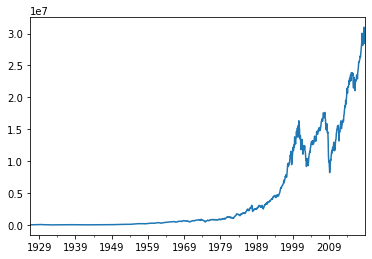

In [5]:
# 시장 전체 규모
total_mktcap = ind_mktcap.sum(axis='columns')
total_mktcap.plot()

In [6]:
# 시장에서 해당 산업이 차지하는 비율(weight)
ind_capweight = ind_mktcap.divide(total_mktcap, axis='rows')
ind_capweight.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.058037,0.000801,0.035844,0.006935,0.000902,0.006683,0.008265,0.006701,0.036726,0.003014,...,0.065714,0.001531,0.014889,0.007956,0.185736,0.000089,0.057748,0.002435,0.008476,0.003639
1926-08,0.056578,0.000738,0.035264,0.006932,0.000972,0.006453,0.008673,0.006583,0.038497,0.002938,...,0.064380,0.001613,0.014732,0.008280,0.183379,0.000066,0.056014,0.002406,0.008258,0.003719
1926-09,0.056699,0.000917,0.036510,0.006810,0.001046,0.006038,0.008249,0.006668,0.039700,0.003109,...,0.064318,0.001609,0.014870,0.007873,0.187292,0.000068,0.054227,0.002339,0.008412,0.003879
1926-10,0.056920,0.000954,0.036736,0.007175,0.001028,0.006053,0.008139,0.006704,0.041486,0.003160,...,0.064896,0.001636,0.014850,0.007436,0.186812,0.000063,0.054280,0.002310,0.008280,0.003730
1926-11,0.056725,0.000951,0.038285,0.007047,0.001161,0.005924,0.008396,0.006831,0.040665,0.003269,...,0.066868,0.001642,0.015118,0.007236,0.187051,0.000054,0.054635,0.002279,0.008096,0.003521


In [7]:
# 제대로 계산됐는지 확인
ind_capweight["1926"].sum(axis="columns")

1926-07    1.0
1926-08    1.0
1926-09    1.0
1926-10    1.0
1926-11    1.0
1926-12    1.0
Freq: M, dtype: float64

<AxesSubplot:>

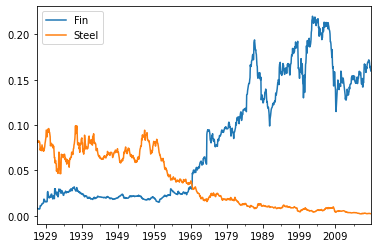

In [8]:
# 특정 산업 분야의 규모 추이
ind_capweight[["Fin", "Steel"]].plot()

## 시장 index 만들기

In [9]:
# 시장 수익률 구하기
total_market_return = (ind_capweight*ind_return).sum(axis="columns")
total_market_return

1926-07    0.031375
1926-08    0.028957
1926-09    0.005566
1926-10   -0.028504
1926-11    0.028039
             ...   
2018-08    0.036951
2018-09    0.002108
2018-10   -0.074292
2018-11    0.019003
2018-12   -0.092911
Freq: M, Length: 1110, dtype: float64

<AxesSubplot:>

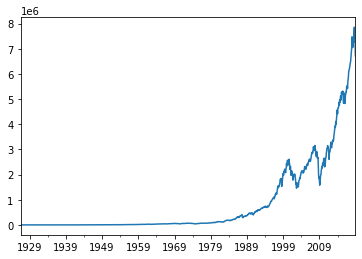

In [10]:
# 시장 수익률에 상수 곱해서 cumprod하면 됨. (drawdown 함수에서 wealth값)
total_market_index = erk.drawdown(total_market_return).Wealth
total_market_index.plot()

<AxesSubplot:>

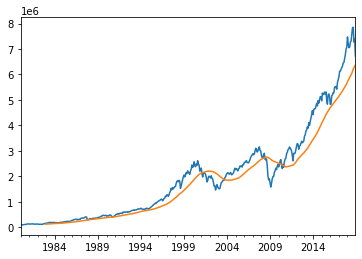

In [11]:
# 이동평균수익률 구하기 - 36개월 기준
total_market_index["1980":].plot()
total_market_index["1980":].rolling(window=36).mean().plot()

<AxesSubplot:>

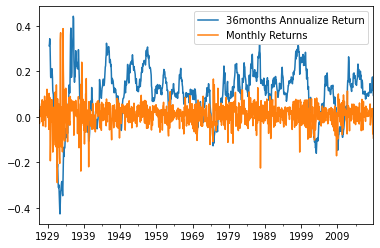

In [12]:
# 36개월 시장 이동평균'연'수익률과 월수익률 비교
tmi_tr36rets = total_market_return.rolling(window=36).aggregate(erk.annualize_rets, periods_per_year=12)
tmi_tr36rets.plot(label='36months Annualize Return', legend=True)
total_market_return.plot(label='Monthly Returns', legend=True)

## 이동상관계수 - MultiIndex와 groupby 활용

In [13]:
# Correlation 구하기
ts_corr = ind_return.rolling(window=36).corr()
ts_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
2018-12 Whlsl  0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail  0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals  0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin    0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other  0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                  Clths      Hlth     Chems     Txtls  ...     Telcm  \
2018-12 Whlsl  0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail  0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals  0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin    0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other  0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                  Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
2018-12 Whlsl  0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail  0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals  0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin    0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other  0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                  Meals       Fin     Other  
2018-12 Whlsl  0.643879  0.746480  0.767652  
        Rtail  0.616947  0.611883  0.619918  
        Meals  1.000000  0.502563  0.605226  
        Fin    0.502563  1.000000  0.734837  
        Other  0.605226  0.734837  1.000000  

[5 rows x 30 columns]

In [14]:
# 인덱스 이름 붙이기
ts_corr.index.names = ['date', 'industry']
ts_corr.index.names

FrozenList(['date', 'industry'])

<AxesSubplot:xlabel='date'>

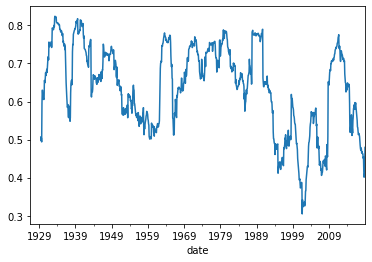

In [15]:
# 각 date마다 평균 corr 구하기
ind_tr36corr = ts_corr.groupby(level='date').apply(lambda cormat: cormat.values.mean())
ind_tr36corr.plot()

<AxesSubplot:label='42ec672e-1862-41d7-81c2-cb112d093a84'>

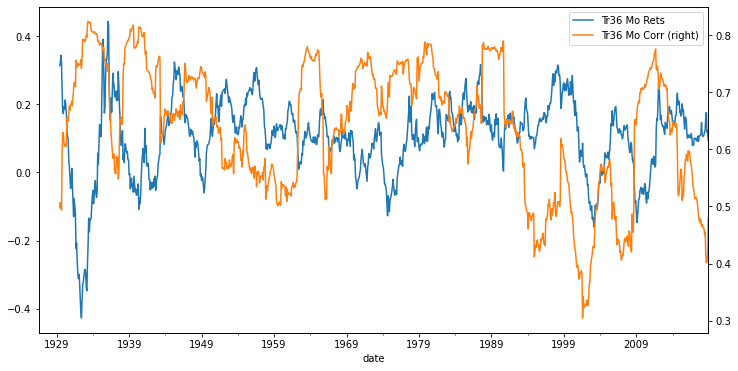

In [16]:
# (이동평균)시장 수익률과 상관계수 비교
tmi_tr36rets.plot(label='Tr36 Mo Rets', figsize=(12,6), legend=True)
ind_tr36corr.plot(label='Tr36 Mo Corr', legend=True, secondary_y=True)

## CPPI - Drawdown 제한 적용해보기

In [17]:
# 산업수익률과 시장수익률
ind_return = erk.get_ind_returns()
tmi_return = erk.get_total_market_index_returns()

In [18]:
# 위험자산
risky_r = ind_return["2000":][["Steel", "Fin", "Beer"]]

In [19]:
# 안전자산
safe_r = pd.DataFrame().reindex_like(risky_r)
safe_r[:] = 0.03 / 12

In [20]:
start = 1000  # 초기자산
floor = 0.8  # 최저한계점(초기자산의 80%)

In [21]:
# 잠깐 딴 소리
def compound1(r):
    return (1+r).prod()-1

def compound2(r):
    return np.expm1(np.log1p(r).sum())

In [22]:
# loop를 최소화 해주는 게 당연히 빠름
%timeit compound1(risky_r)
%timeit compound2(risky_r)

380 µs ± 10.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
367 µs ± 22 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [23]:
# CPPI 만들기
dates = risky_r.index
n_steps = len(dates)
account_value = start
floor_value = start * floor
m = 3
account_history = pd.DataFrame().reindex_like(risky_r)
cushion_history = pd.DataFrame().reindex_like(risky_r)
risky_w_history = pd.DataFrame().reindex_like(risky_r)

for step in range(n_steps):
    cushion = (account_value-floor_value) / account_value  ## cushion을 백분율로 표현 (weight계산하기 편하게)
    risky_w = m * cushion
    risky_w = np.minimum(1, risky_w)
    risky_w = np.maximum(0, risky_w)
    safe_w = 1 - risky_w
    risky_alloc = account_value * risky_w
    safe_alloc = account_value * safe_w
    
    # account value 갱신
    account_value = (1+risky_r.iloc[step])*risky_alloc + (1+safe_r.iloc[step])*safe_alloc
    
    # history에 계산값 저장
    cushion_history.iloc[step] = cushion
    risky_w_history.iloc[step] = risky_w
    account_history.iloc[step] = account_value

In [24]:
account_history.head()

,Steel,Fin,Beer
2000-01,984.380000,974.480000,987.320000
2000-02,1023.292876,931.167544,922.971256
2000-03,1047.555176,998.187296,924.835988
2000-04,1042.079009,973.927479,939.993701
2000-05,1007.137753,1001.460033,991.145489


In [25]:
# 그냥 위험자산에만 투자했을 경우
risky_wealth = start*(1+risky_r).cumprod()

<AxesSubplot:>

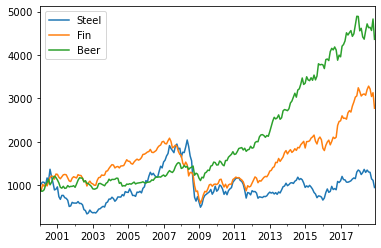

In [26]:
risky_wealth.plot()

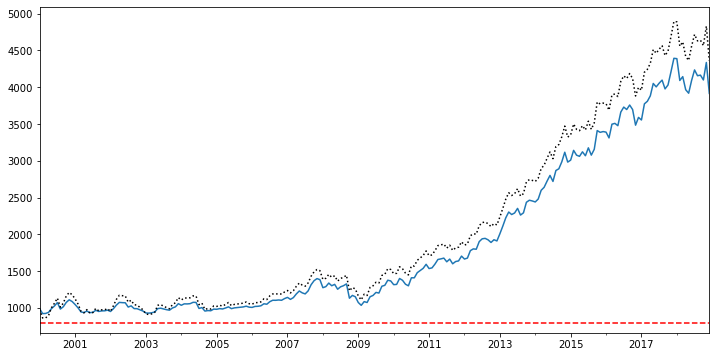

In [27]:
# CPPI를 적용한 경우와 그냥 위험자산에만 투자한 경우 비교
ind = "Beer"
ax = account_history[ind].plot(figsize=(12,6))
risky_wealth[ind].plot(ax=ax, style='k:')
ax.axhline(y=floor_value, color='r', linestyle='--')

<AxesSubplot:>

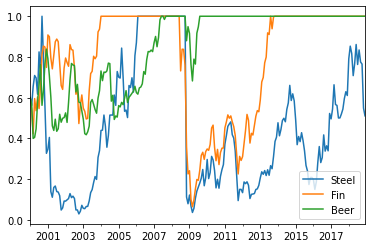

In [28]:
risky_w_history.plot()

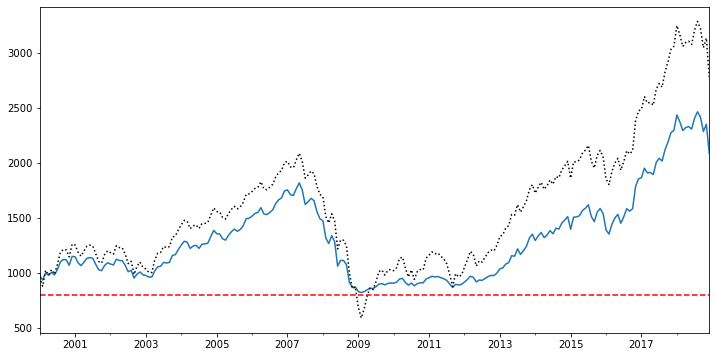

In [29]:
ind = "Fin"
ax = account_history[ind].plot(figsize=(12,6))
risky_wealth[ind].plot(ax=ax, style='k:')
ax.axhline(y=floor_value, color='r', linestyle='--')

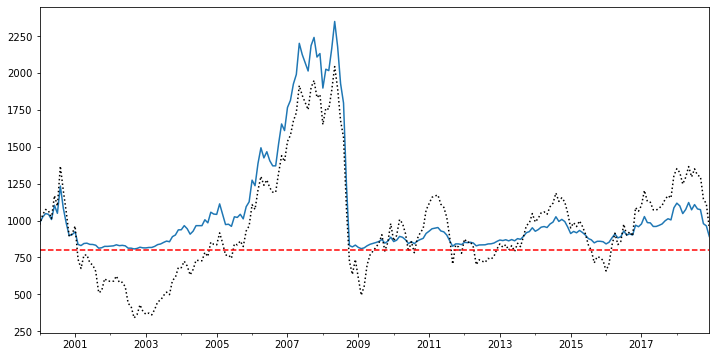

In [30]:
ind = "Steel"
ax = account_history[ind].plot(figsize=(12,6))
risky_wealth[ind].plot(ax=ax, style='k:')
ax.axhline(y=floor_value, color='r', linestyle='--')

In [31]:
erk.summary_stats(risky_r)

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR,Sharpe Ratio,Max Drawdown
Steel,-0.002790,0.312368,-0.326334,4.144381,0.150139,0.208117,-0.102567,-0.758017
Fin,0.055166,0.192909,-0.533218,4.995534,0.091224,0.132175,0.126718,-0.718465
Beer,0.080598,0.138925,-0.493545,4.173881,0.063015,0.091442,0.354314,-0.271368


In [32]:
# 위험수익률 입력 후 CPPI 백테스트
btr = erk.run_cppi(risky_r)

In [33]:
# CPPI 적용했을 때
erk.summary_stats(btr["Wealth"].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR,Sharpe Ratio,Max Drawdown
Steel,-0.005167,0.174180,-1.995143,17.110190,0.091995,0.130153,-0.196750,-0.655198
Fin,0.040894,0.131678,-0.946504,6.051414,0.065535,0.091621,0.080352,-0.549673
Beer,0.075544,0.115462,-0.669250,4.760879,0.052923,0.074908,0.383772,-0.259582


In [34]:
# 그냥 위험자산 투자했을 때
erk.summary_stats(btr["Risky Wealth"].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR,Sharpe Ratio,Max Drawdown
Steel,-0.001320,0.312973,-0.330333,4.132666,0.150415,0.208117,-0.097801,-0.758017
Fin,0.057941,0.192986,-0.543630,5.015294,0.091172,0.132175,0.140661,-0.718465
Beer,0.082286,0.139058,-0.502368,4.181533,0.063037,0.091442,0.365788,-0.271368


<AxesSubplot:>

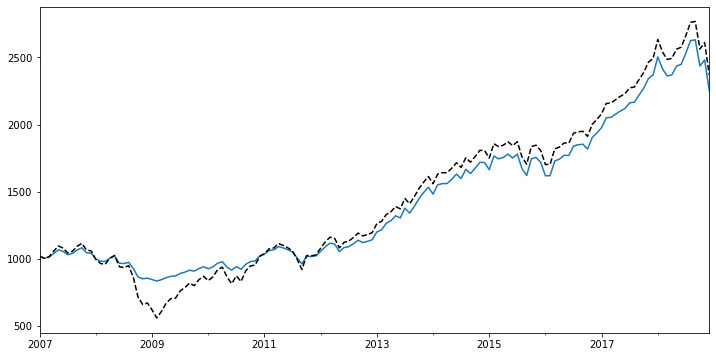

In [35]:
btr = erk.run_cppi(tmi_return["2007":])
ax = btr["Wealth"].plot(figsize=(12,6), legend=False)
btr["Risky Wealth"].plot(ax=ax, legend=False, style='k--')

In [36]:
erk.summary_stats(btr["Risky Wealth"].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR,Sharpe Ratio,Max Drawdown
R,0.073411,0.150463,-0.734939,4.523488,0.071592,0.096315,0.280618,-0.499943


In [37]:
erk.summary_stats(btr["Wealth"].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR,Sharpe Ratio,Max Drawdown
R,0.069416,0.100381,-0.588292,3.740932,0.045678,0.062953,0.382052,-0.229683


### Drawdown 제한

In [38]:
btr = erk.run_cppi(ind_return["2007":][["Steel", "Fin", "Beer"]], drawdown = 0.25)
# 전고점 대비 25% 손실 제한(floor = peak*(1-drawdown))

<AxesSubplot:>

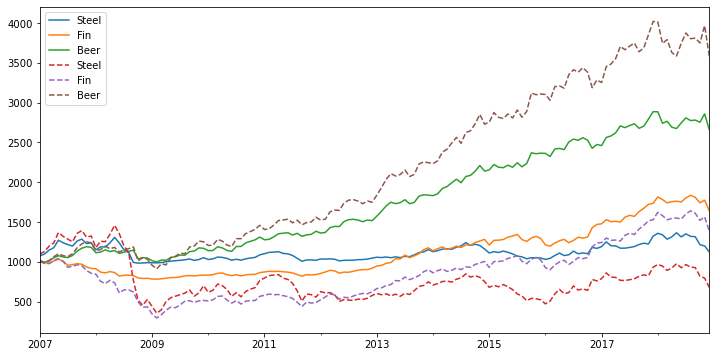

In [39]:
ax = btr["Wealth"].plot(figsize=(12,6))
btr["Risky Wealth"].plot(ax=ax, style="--")

In [40]:
erk.summary_stats(btr["Risky Wealth"].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR,Sharpe Ratio,Max Drawdown
Steel,-0.039660,0.306407,-0.459951,4.782828,0.152288,0.203837,-0.221642,-0.758017
Fin,0.027364,0.212204,-0.695200,4.621401,0.105744,0.149862,-0.012370,-0.718465
Beer,0.111554,0.127971,-0.670797,4.650878,0.056497,0.077388,0.620132,-0.271368


In [41]:
erk.summary_stats(btr["Wealth"].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR,Sharpe Ratio,Max Drawdown
Steel,0.003784,0.097073,-0.441089,5.220481,0.047371,0.066991,-0.262958,-0.248059
Fin,0.041975,0.085028,-0.355163,4.153860,0.038342,0.054111,0.136964,-0.243626
Beer,0.084375,0.086263,-0.744111,4.571533,0.037937,0.051189,0.613413,-0.161186


# Random Walk

### 기하브라운운동 모델 방정식
$ \frac{S_{t+dt} - S_t}{S_t} = \mu dt + \sigma \sqrt{dt} \xi$

$dt = \sqrt{dt} \xi $ 

$ \mu = r+\sigma\lambda$

람다는 샤프지수, mu는 drift, sigma는 변동성.

참고 : https://wikidocs.net/92455

In [70]:
# 기하브라운운동 모델 만들기
def gbm0(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100):
    """
    Evolution of a Stock Price using a Geometric Brownian Motion Model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years * steps_per_year)
    xi = np.random.normal(size=(n_steps, n_scenarios))
    rets = mu*dt + sigma*np.sqrt(dt)*xi
    rets = pd.DataFrame(rets)
    
    prices = s_0*(1+rets).cumprod()
    return prices

In [57]:
p = gbm(n_years=10, n_scenarios=3)
p

,0,1,2
0,101.229765,101.158553,97.360287
1,101.044322,99.894836,101.909856
2,102.355911,97.398994,99.893073
3,109.339047,99.379022,96.003574
4,109.097026,100.118575,92.475090
...,...,...,...
115,128.522964,130.049572,188.926355
116,131.387811,136.760087,199.069265
117,129.191237,137.906023,204.042590
118,125.362460,133.483125,212.705456


<AxesSubplot:>

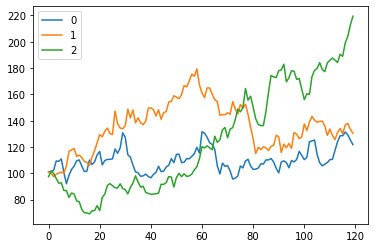

In [59]:
# $100로 시작한 브라운운동모형 3가지 시나리오
p.plot()

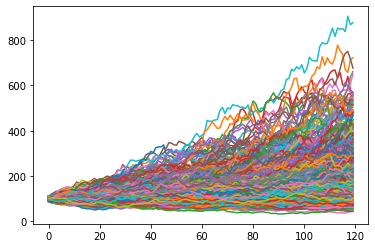

In [61]:
p = gbm1(n_years=10, n_scenarios=1000).plot(legend=False)

In [72]:
# loop 줄여서 더 빠르게 만들기

def gbm0(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100):
    """
    Evolution of a Stock Price using a Geometric Brownian Motion Model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years * steps_per_year)
    xi = np.random.normal(size=(n_steps, n_scenarios))
    rets = mu*dt + sigma*np.sqrt(dt)*xi
    rets = pd.DataFrame(rets)
    
    prices = s_0*(1+rets).cumprod()
    return prices

def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100):
    """
    Evolution of a Stock Price using a Geometric Brownian Motion Model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years * steps_per_year)
    rets_plus_1 = np.random.normal(loc=1+mu*dt, scale=sigma*np.sqrt(dt), size=(n_steps, n_scenarios))
    
    prices = s_0 * pd.DataFrame(rets_plus_1).cumprod()
    return prices

<AxesSubplot:>

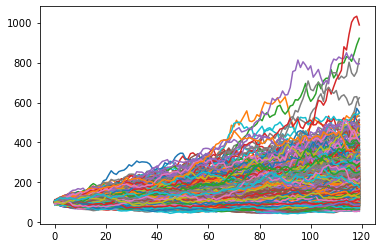

In [73]:
gbm(n_years=10, n_scenarios=1000).plot(legend=False)

In [75]:
# 초기값 통일

def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100):
    """
    Evolution of a Stock Price using a Geometric Brownian Motion Model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years * steps_per_year)
    rets_plus_1 = np.random.normal(loc=1+mu*dt, scale=sigma*np.sqrt(dt), size=(n_steps, n_scenarios))
    rets_plus_1[0] = 1  ## 어차피 랜덤값이니까 맨처음은 1로 고정
    
    prices = s_0 * pd.DataFrame(rets_plus_1).cumprod()
    return prices

In [77]:
gbm(n_years=10, n_scenarios=1000).head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,93.699044,100.836238,101.310054,104.968018,106.385596,97.034566,103.011108,96.797529,99.374636,100.404941,...,104.589731,109.701512,99.052465,100.499876,100.824346,95.868630,94.516299,103.361661,89.919890,98.571580
2,90.966567,101.785432,101.136086,97.160339,111.607517,102.345733,101.809083,96.044354,102.041720,103.320803,...,109.599765,114.725892,98.886833,109.201035,104.374589,91.176095,94.205623,106.440974,87.409321,97.583496
3,85.134275,109.065336,105.068915,94.388693,108.289768,109.289937,111.934532,102.735705,104.172898,96.451115,...,123.881582,121.814039,104.405483,104.144138,100.958540,94.993124,90.233554,105.252203,81.231360,102.889848
4,89.411799,107.290229,112.591436,96.213114,118.285697,118.567702,119.518762,106.269724,100.300614,93.999348,...,124.135750,124.811370,109.632138,99.603044,97.887438,103.229810,85.874153,99.787009,84.937416,96.686686


# CPPI 몬테카를로 시뮬레이션 해보기!

In [120]:
import ipywidgets as widgets
from IPython.display import display

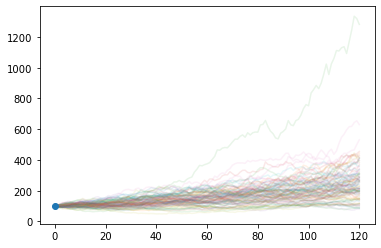

In [111]:
ax = erk.gbm(10, 100, mu=0.1).plot(legend=False, alpha=0.1)
ax.plot(0, 100, marker='o', )

In [118]:
# gbm 깔끔하게 나타내기
def show_gbm(n_scenarios, mu, sigma):
    """
    Draw the results of a stck price evolution under a Geometric Brownian Motion model
    """
    s_0 = 100
    prices = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, s_0=s_0)
    ax = prices.plot(legend=False, color="indianred", alpha=0.5, linewidth=2, figsize=(12,5))
    ax.axhline(y=s_0, ls=':', color='black')
    ax.set_ylim(top=400)
    # Draw a dot at the origin
    ax.plot(0, s_0, marker='o', color='darkred', alpha=1)

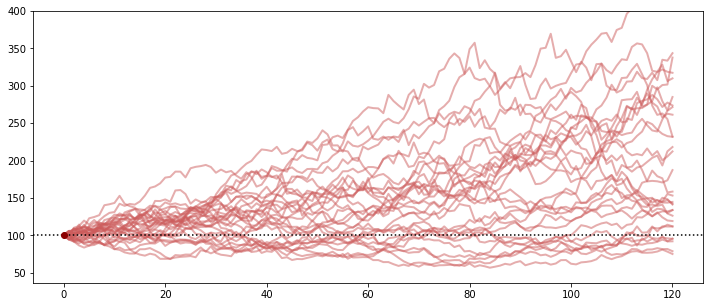

In [119]:
show_gbm(30, 0.07, 0.15)

In [123]:
# 컨트롤러 만들기
gbm_controls = widgets.interactive(show_gbm,
                                  n_scenarios = (1, 100, 1),
                                   mu = (-0.2, 0.2, 0.01),
                                   sigma = (0, 0.3, 0.01)
                                  )
display(gbm_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', min=1), FloatSlider(value=0.0, descriptio…

## 컨트롤러 적용한 CPPI - 몬테 카를로 시뮬레이션 만들기

In [128]:
def show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0., riskfree_rate=0.03, y_max=100):
    """
    Plot the results of a Monte Carlo Simulation of CPPI
    """
    start = 100
    sim_rets = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, prices=False, steps_per_year=12)
    risky_r = pd.DataFrame(sim_rets)
    # Run the "Back"-test
    btr = erk.run_cppi(risky_r=pd.DataFrame(risky_r), riskfree_rate=riskfree_rate, m=m, start=start, floor=floor)
    wealth = btr["Wealth"]
    y_max = wealth.values.max()*y_max/100  ## y값 기준으로 Zoom하는 기능
    ax = wealth.plot(legend=False, alpha=0.3, color='indianred', figsize=(12,6))
    ax.axhline(y=start, ls=':', color='black')  ## 시작선
    ax.axhline(y=start*floor, ls='--', color='red')  ## floor선
    ax.set_ylim(top=y_max)
    
cppi_controls = widgets.interactive(show_cppi,
                                   n_scenarios=widgets.IntSlider(min=1, max=1000, step=5, value=50),
                                    mu=(0, 0.2, 0.01),
                                    sigma=(0, 0.3, 0.05),
                                    floor=(0, 2, 0.1),
                                    m=(1, 5, 0.5),
                                    riskfree_rate=(0, 0.05, 0.01),
                                    y_max=widgets.IntSlider(min=0, max=100, step=1, value=100, description='Zoom Y Axis')
                                    ## value는 디폴트값, description은 타이틀
                                   )

display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

In [129]:
import matplotlib.pyplot as plt

In [159]:
def show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0., riskfree_rate=0.03, y_max=100):
    """
    Plot the results of a Monte Carlo Simulation of CPPI
    """
    start = 100
    sim_rets = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, prices=False, steps_per_year=12)
    risky_r = pd.DataFrame(sim_rets)
    # Run the "Back"-test
    btr = erk.run_cppi(risky_r=pd.DataFrame(risky_r), riskfree_rate=riskfree_rate, m=m, start=start, floor=floor)
    wealth = btr["Wealth"]
    # Calculate terminal wealth stats
    y_max = wealth.values.max()*y_max/100
    terminal_wealth = wealth.iloc[-1]  ## 각 시나리오마다 최종 자산
    # Plot
    fig, (wealth_ax, hist_ax) = plt.subplots(nrows=1, ncols=2, sharey=True, gridspec_kw={'width_ratios': [3,2]}, figsize=(24,9))
    plt.subplots_adjust(wspace=0.0)
    
    
    wealth.plot(ax=wealth_ax, legend=False, alpha=0.3, color='indianred', figsize=(12,6))
    wealth_ax.axhline(y=start, ls=':', color='black')
    wealth_ax.axhline(y=start*floor, ls='--', color='red')
    wealth_ax.set_ylim(top=y_max)
    
    terminal_wealth.plot.hist(ax=hist_ax, bins=50, ec='w', fc='indianred', orientation='horizontal')
    ## ec는 bar의 테두리 색깔, fc는 bar 색깔
    hist_ax.axhline(y=start, ls=':', color='black')
    
cppi_controls = widgets.interactive(show_cppi,
                                   n_scenarios=widgets.IntSlider(min=1, max=1000, step=5, value=50),
                                    mu=(0, 0.2, 0.01),
                                    sigma=(0, 0.3, 0.05),
                                    floor=(0, 2, 0.1),
                                    m=(1, 5, 0.5),
                                    riskfree_rate=(0, 0.05, 0.01),
                                    y_max=widgets.IntSlider(min=0, max=100, step=1, value=100, description='Zoom Y Axis')
                                   )
display(cppi_controls)

In [163]:
def show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0., riskfree_rate=0.03, steps_per_year=12, y_max=100):
    """
    Plot the results of a Monte Carlo Simulation of CPPI
    """
    start = 100
    sim_rets = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, prices=False, steps_per_year=steps_per_year)
    risky_r = pd.DataFrame(sim_rets)
    # Run the "Back"-test
    btr = erk.run_cppi(risky_r=pd.DataFrame(risky_r), riskfree_rate=riskfree_rate, m=m, start=start, floor=floor)
    wealth = btr["Wealth"]
    # Calculate terminal wealth stats
    y_max = wealth.values.max()*y_max/100
    terminal_wealth = wealth.iloc[-1]
    
    tw_mean = terminal_wealth.mean()
    tw_median = terminal_wealth.median()
    failure_mask = np.less(terminal_wealth, start*floor)  ## floor보다 낮은 경우 -> True
    n_failures = failure_mask.sum()  ## True(1)인 경우의 수
    p_fail = n_failures/n_scenarios
    
    e_shortfall = np.dot(terminal_wealth-start*floor, failure_mask)/n_failures if n_failures > 0 else 0.0
    ## floor보다 낮은 경우에만 평균을 구함 -> ES(Expected Shortfall, CVaR)
    
    # Plot
    fig, (wealth_ax, hist_ax) = plt.subplots(nrows=1, ncols=2, sharey=True, gridspec_kw={'width_ratios': [3,2]}, figsize=(24,9))
    plt.subplots_adjust(wspace=0.0)
    
    wealth.plot(ax=wealth_ax, legend=False, alpha=0.3, color='indianred')
    wealth_ax.axhline(y=start, ls=':', color='black')
    wealth_ax.axhline(y=start*floor, ls='--', color='red')
    wealth_ax.set_ylim(top=y_max)
    
    terminal_wealth.plot.hist(ax=hist_ax, bins=50, ec='w', fc='indianred', orientation='horizontal')
    hist_ax.axhline(y=start, ls=':', color='black')
    hist_ax.axhline(y=tw_mean, ls=':', color='blue')
    hist_ax.axhline(y=tw_median, ls=':', color='purple')
    hist_ax.annotate("Mean: {0}".format(int(tw_mean)), xy=(0.7, 0.9), xycoords='axes fraction', fontsize=24)
    hist_ax.annotate("Median: {0}".format(int(tw_median)), xy=(0.7, 0.85), xycoords='axes fraction', fontsize=24)
    if (floor > 0.01):  ## floor가 0보다 큰 경우 violation과 es를 표시하도록
        hist_ax.axhline(y=start*floor, ls='--', color='red', linewidth=3)
        hist_ax.annotate("Violations: {0} ({1:2.2f}%)\nE(shortfall)=${2:2.2f}".format(n_failures, p_fail*100, e_shortfall), xy=(0.7, 0.7), xycoords='axes fraction', fontsize=24)
    
cppi_controls = widgets.interactive(show_cppi,
                                   n_scenarios=widgets.IntSlider(min=1, max=1000, step=5, value=50),
                                    mu=(0, 0.2, 0.01),
                                    sigma=(0, 0.5, 0.05),
                                    floor=(0, 2, 0.1),
                                    m=(1, 5, 0.5),
                                    riskfree_rate=(0, 0.05, 0.01),
                                    steps_per_year=widgets.IntSlider(min=1, max=12, step=1, value=12, description="Rebals/Year"),
                                    y_max=widgets.IntSlider(min=0, max=100, step=1, value=100, description='Zoom Y Axis')
                                   )
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…